AIS - Artificial Immune System ou Sistema Imunológico Artificial é uma metaheurística que teve como um dos primeiros pesquisadores Kephart (1994) que propôs resolver problemas inspirados no princípio do sistema imunológico com base nas características de aprendizado e memória.

Kephart, J.O. A biologically inspired immune system for computers. Artificial Life IV: proceedings of the fourth international workshop on the synthesis and simulation of living systems. https://doi.org/10.7551/mitpress/1428.003.0017, 1994.

CLONal selection ALGorithm (CLONALG) ou Algoritmos de Seleção Clonal - são uma classe de algoritmos inspirados na teoria da seleção clonal da imunidade adquirida que explica como os linfócitos B e T melhoram sua resposta aos antígenos ao longo do tempo, chamada maturação de afinidade. Esses algoritmos se concentram nos atributos darwinianos da teoria em que a seleção é inspirada na afinidade das interações antígeno-anticorpo
e a reprodução é inspirada na divisão celular e a variação é inspirada na hipermutação somática. Os algoritmos de seleção clonal são mais comumente aplicados a domínios de otimização e reconhecimento de padrões
alguns dos quais se assemelham a escalada paralela e o algoritmo genético sem o operador de recombinação.

Brownlee, J. Clonal Selection Algorithms. Complex Intelligent Systems Laboratory, Centre for Information Technology Research, Faculty of Information Communication Technology, Swinburne University of Technology, Melbourne, Australia. https://researchbank.swinburne.edu.au/file/c0a1d68c-8126-4a20-a530-eb6cb2cdd636/1/PDF%20%2813%20pages%29.pdf, 2007.

In [ ]:
#instala biblioteca Orange Canvas
!pip install Orange3

In [ ]:
#importa bibliotecas
import Orange
import random
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
from numpy.random import choice

In [ ]:
#define os hiperparâmetros
DIMENSOES = 2 #determina a quantidade de dimensões do problema
ITERACOES = 200 #quantiddade máxima de ciclos (episódios) especificando quantas explorações podem ser realizadas
POPULACAO = 20 #tamanho da população correspondente ao indivíduo
E1 = -100 #extremo esquerdo eixo x
E2 = 100 #extremo direito eixo x
E3 = -100 #extremo inferior eixo y
E4 = 100 #extremo superior eixo y
LIMITES = [E3, E4] #LIMITES = [E1,E4] #(bound) determina os valores mínimos e máximos do espaço de busca
FCUSTO = 'ponderação' #(fitness) define a aptidão do agente imunológico na possível solução do problema
FATOR_CLONAGEM = 0.5
TAXA_MUTACAO = 0.4
NUMERO_SELECAO = int(POPULACAO/4)
NOVOS_INDIVIDUOS = int(POPULACAO/4)
INDIVIDUOS = [] #(swarm) array da criação dos indivíduos da população

In [ ]:
#importa dados
from google.colab import files  
files.upload()

In [ ]:
#instancia objeto de dados com base no caminho gerado na importação do arquivo
dados = Orange.data.Table("/content/dados.csv")

In [ ]:
#explora os metadados e dados da arquivo importado
qtde_campos = len(dados.domain.attributes)
qtde_cont = sum(1 for a in dados.domain.attributes if a.is_continuous)
qtde_disc = sum(1 for a in dados.domain.attributes if a.is_discrete)
print("%d metadados: %d continuos, %d discretos" % (qtde_campos, qtde_cont, qtde_disc))
print("Nome dos metadados:", ", ".join(dados.domain.attributes[i].name for i in range(qtde_campos)),)
dados.domain.attributes #explora os domínios dos atributos (campos da base de dados)
print("Registros:", len(dados)) #explora os dados (quantidade de registros da base de dados)
i = 0 #exibe os primeiros registros para análise dos dados importados
for d in dados[:20]:
  i += 1
  print(i, d)

8 metadados: 8 continuos, 0 discretos
Nome dos metadados: PROCESSO, ANO, COMPLEXIDADE, PAGINA, PRAZO, REVISOES, ENTREGA, VALOR(milR$)
Registros: 1013
1 [2022000101, 2019, 3, 12, 10, 4, 36, 13]
2 [2022000102, 2020, 3, 20, 10, 4, 36, 17]
3 [2022000103, 2020, 3, 55, 15, 5, 70, 28]
4 [2022000104, 2018, 4, 43, 10, 4, 36, 26]
5 [2022000105, 2018, 2, 24, 10, 4, 36, 62]
6 [2022000106, 2019, 1, 93, 15, 3, 42, 37]
7 [2022000107, 2018, 3, 44, 10, 5, 45, 87]
8 [2022000108, 2020, 2, 37, 10, 5, 45, 8]
9 [2022000109, 2020, 1, 11, 10, 2, 18, 22]
10 [2022000110, 2019, 1, 10, 5, 2, 8, 39]
11 [2022000111, 2020, 2, 32, 10, 5, 45, 43]
12 [2022000112, 2019, 2, 13, 10, 3, 27, 13]
13 [2022000113, 2020, 1, 14, 10, 2, 18, 5]
14 [2022000114, 2020, 3, 51, 15, 1, 14, 85]
15 [2022000115, 2019, 4, 8, 5, 1, 4, 18]
16 [2022000116, 2020, 3, 82, 15, 2, 28, 41]
17 [2022000117, 2020, 2, 12, 10, 3, 27, 56]
18 [2022000118, 2018, 2, 16, 10, 2, 18, 18]
19 [2022000119, 2018, 2, 97, 15, 5, 70, 92]
20 [2022000120, 2018, 4, 87, 1

In [ ]:
#cria arrays das dimensões do problema a ser otimizado
periodo = []
complexidade = [] #1-muito baixa complexidade;2-baixa complexidade;3-média complexidade;4-alta complexidade;e,5-muito alta complexidade
pagina = []
prazo = []
revisao = []
entrega = []
valor = []
i = 0
for d in dados[:POPULACAO]:
  periodo.append(d[1])
  complexidade.append(d[2])
  pagina.append(d[3])
  prazo.append(d[4])
  revisao.append(d[5])
  entrega.append(d[6])
  valor.append(d[7])
  print("id:",i,"período:",periodo[i],"complexidade:",complexidade[i],"página:",pagina[i],"prazo:",prazo[i],"revisões:",revisao[i],"entrega:",entrega[i],"valor:",valor[i])
  i += 1

id: 0 período: 2019 complexidade: 3 página: 12 prazo: 10 revisões: 4 entrega: 36 valor: 13
id: 1 período: 2020 complexidade: 3 página: 20 prazo: 10 revisões: 4 entrega: 36 valor: 17
id: 2 período: 2020 complexidade: 3 página: 55 prazo: 15 revisões: 5 entrega: 70 valor: 28
id: 3 período: 2018 complexidade: 4 página: 43 prazo: 10 revisões: 4 entrega: 36 valor: 26
id: 4 período: 2018 complexidade: 2 página: 24 prazo: 10 revisões: 4 entrega: 36 valor: 62
id: 5 período: 2019 complexidade: 1 página: 93 prazo: 15 revisões: 3 entrega: 42 valor: 37
id: 6 período: 2018 complexidade: 3 página: 44 prazo: 10 revisões: 5 entrega: 45 valor: 87
id: 7 período: 2020 complexidade: 2 página: 37 prazo: 10 revisões: 5 entrega: 45 valor: 8
id: 8 período: 2020 complexidade: 1 página: 11 prazo: 10 revisões: 2 entrega: 18 valor: 22
id: 9 período: 2019 complexidade: 1 página: 10 prazo: 5 revisões: 2 entrega: 8 valor: 39
id: 10 período: 2020 complexidade: 2 página: 32 prazo: 10 revisões: 5 entrega: 45 valor: 43
i

In [ ]:
#função custo ou objetivo ou aptidão ou otimização ou fitness - usada para buscar o melhor ponto dentro de um espaço de buscao (melhor global) sem ficar preso em um melhor local
def fcusto(problema, possivel_solucao, alfa=0, beta=0, gama=0, delta=0, epsilon=0, zeta=0):
  total = 0.0
  if problema == 'ponderação':
    #f(x) = (0.2α + 0.2β + 0.1γ + 0.1δ + 0.1ε + 0.3θ) / 0.10
    #d1 alfa (α) complexidade - peso = 0.2
    #d2 beta (β) página - peso = 0.2
    #d3 gama (γ) prazo - peso = 0.1
    #d4 delta (δ) revisões - peso = 0.1
    #d5 epsilon (ε) entrega - peso = 0.1
    #d6 zeta (θ) valor - peso = 0.3
    total_peso = 0
    for i in range(DIMENSOES):
      if (i==0):
        peso = 0.2 #(α)
        total += possivel_solucao[i]*peso
        total_peso += peso
      elif (i==1):
        peso = 0.2 #(β)
        total += possivel_solucao[i]*peso
        total_peso += peso
      elif (i==2):
        peso = 0.1 #(γ)
        total += possivel_solucao[i]*peso
        total_peso += peso
      elif (i==3):
        peso = 0.1 #(δ)
        total += possivel_solucao[i]*peso
        total_peso += peso
      elif (i==4):
        peso = 0.1 #(ε)
        total += possivel_solucao[i]*peso
        total_peso += peso
      elif (i==5):
        peso = 0.3 #(θ)
        total += possivel_solucao[i]*peso
        total_peso += peso
    total = total / total_peso  
  elif problema == 'rosenbrock':
    for i in range(DIMENSOES-1):
      total += 100*(possivel_solucao[i+1] - possivel_solucao[i]**2)**2 + (1-possivel_solucao[i])**2
  elif problema == 'esfera':
    for i in range(DIMENSOES):
      total += possivel_solucao[i]**2
  elif problema == 'custo':
    for i in range(DIMENSOES-1):
      total += 1 / abs(sum([coord ** 2 for coord in possivel_solucao]))
  elif problema == 'caminho':
    denominador = sum([(caminho.feromonio)**alfa * (1 / caminho.comprimento)**beta for caminho in possivel_solucao])
    distribuicao_probabilidades = None
    if denominador == 0:
      distribuicao_probabilidades = [1 / len(possivel_solucao)  for _ in possivel_solucao]
    else:
      distribuicao_probabilidades = [((caminho.feromonio)**alfa * (1 / caminho.comprimento)**beta) / denominador for caminho in possivel_solucao]
    total = choice(possivel_solucao, 1, p=distribuicao_probabilidades)[0]
  elif problema == "distância":
    total = 0
    pontos = []
    for i in range(POPULACAO): 
      if i < POPULACAO - 1:
        total += pontos[possivel_solucao[i]].distancia(pontos[possivel_solucao[i+1]])
      else:
        total += pontos[possivel_solucao[i]].distancia(pontos[possivel_solucao[0]])
    total = 1/total
  else:
    print('Problema não encontrado!')
  return total

In [ ]:
#calcula o fitness da população
def calcula_fitness_populacao(populacao):
  fitness = []
  for index, i in enumerate(populacao):
    fitness.append([fcusto(FCUSTO,i), index])
  return fitness

In [ ]:
#calcula a ordenação do melhor (menor) para o pior
def ordenar_fitness(lista_fitness):
  lista_ordenada = []
  for i in lista_fitness:
    if len(lista_ordenada) == 0:
      lista_ordenada.append(i)
    else:
      for index, j in enumerate(lista_ordenada):
        if i[0] < j[0]:
          lista_ordenada.insert(index, i)
          break
      else:
        lista_ordenada.append(i)
  return lista_ordenada

In [ ]:
#calcula clonagem
def clonagem(individuo):
    numero_de_clones = math.ceil(FATOR_CLONAGEM * POPULACAO / individuo[0])
    clones = []
    for i in range(numero_de_clones):
      clones.append(individuo)    
    return clones

In [ ]:
#calcula mutação
def mutacao(individuo, populacao):
  probabilidade = random.random()
  if probabilidade < (individuo[0] / (TAXA_MUTACAO*100)):
    individuo_mutado = []
    for dimensao in populacao[individuo[1]]:
      probabilidade = random.random()
      if probabilidade < (individuo[0] / (TAXA_MUTACAO*100)):
        nova_posicao = random.random()*(LIMITES[1]-LIMITES[0]) - LIMITES[1]
        individuo_mutado.append( nova_posicao )
      else:
        individuo_mutado.append(dimensao)
    return individuo_mutado
  else:
    return populacao[individuo[1]]

In [ ]:
#calcula seleção
def selecao(populacao_inicial, populacao_clonada):
  nova_populacao = populacao_inicial + populacao_clonada
  novos_fitness = calcula_fitness_populacao(nova_populacao)
  novos_fitness = ordenar_fitness(novos_fitness)
  populacao = []
  for i in range(POPULACAO):
    populacao.append(nova_populacao[novos_fitness[i][1]])
  return populacao

In [ ]:
#gera novos indivíduos
def gerar_novos_individuos(quantidade):
  populacao = []
  for i in range(quantidade):
    ind = []
    for j in range(DIMENSOES):
      ind.append(random.random()*(LIMITES[1]-LIMITES[0]) - LIMITES[1])
    populacao.append(ind)
  return populacao

In [ ]:
#plota posições no gráfico
def exibe_grafico(titulo,lista_pontos,tipo='pontos'):
  x = []
  y = []
  z = []
  k = []
  w = []
  p = []
  plt.axis([E1,E2,E3,E4])
  plt.plot(0,0, marker='*', markersize=10, color='b')
  plt.title(titulo)
  for i in range(len(lista_pontos)):
    if DIMENSOES==2:
      d1,d2 = zip(lista_pontos[i])
      x.append(d1)
      y.append(d2)
      plt.plot(d1,d2,marker='o')
    elif DIMENSOES==3:
      d1,d2,d3 = zip(lista_pontos[i])
      x.append(d1)
      y.append(d2)
      z.append(d3)
      plt.plot(d1,d2,d3,marker='o')
    elif DIMENSOES==4:
      d1,d2,d3,d4 = zip(lista_pontos[i])
      x.append(d1)
      y.append(d2)
      z.append(d3)
      k.append(d4)
      plt.plot(d1,d2,d3,d4,marker='o')
    elif DIMENSOES==5:
      d1,d2,d3,d4,d5 = zip(lista_pontos[i])
      x.append(d1)
      y.append(d2)
      z.append(d3)
      k.append(d4)
      w.append(d5)
      plt.plot(d1,d2,d3,d4,d5,marker='o')
    elif DIMENSOES==6:
      d1,d2,d3,d4,d5,d6 = zip(lista_pontos[i])
      x.append(d1)
      y.append(d2)
      z.append(d3)
      k.append(d4)
      w.append(d5)
      p.append(d6)
      plt.plot(d1,d2,d3,d4,d5,d6,marker='o') 
    else:
      d1,d2 = zip(lista_pontos[i])
      x.append(d1)
      y.append(d2)
      plt.plot(d1,d2,marker='o')
  if (tipo=='caminhos'):
    if (DIMENSOES==3):
      plt.plot(x,y,z,linewidth=0.6,color='c')
    elif (DIMENSOES==4):
      plt.plot(x,y,z,k,linewidth=0.6,color='c')
    elif (DIMENSOES==5):
      plt.plot(x,y,z,k,w,linewidth=0.6,color='c')
    elif (DIMENSOES==6):
      plt.plot(x,y,z,k,w,p,linewidth=0.6,color='c')
    else:
      plt.plot(x,y,linewidth=0.6,color='c')
  plt.show()

In [ ]:
#inicializa população (indivíduos)
populacao = []
for i in range(POPULACAO):
  cpx = complexidade[i]
  pag = pagina[i]
  prz = prazo[i]
  rev = revisao[i]
  ent = entrega[i]
  val = valor[i]
  posicao = 0
  individuo = []
  for j in range(DIMENSOES):
    if (j==0):
      posicao = cpx
    elif (j==1):
      posicao = pag
    elif (j==2):
      posicao = prz
    elif (j==3):
      posicao = rev
    elif (j==4):
      posicao = ent
    elif (j==5):
      posicao = val
    else:
      posicao = random.random()*(LIMITES[1]-LIMITES[0]) - LIMITES[1]
    individuo.append(posicao)
  populacao.append(individuo)
  print("indivíduo:",i,"indivíduo:",populacao[i])

indivíduo: 0 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 12)]
indivíduo: 1 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 20)]
indivíduo: 2 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 55)]
indivíduo: 3 indivíduo: [Value('COMPLEXIDADE', 4), Value('PAGINA', 43)]
indivíduo: 4 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 24)]
indivíduo: 5 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 93)]
indivíduo: 6 indivíduo: [Value('COMPLEXIDADE', 3), Value('PAGINA', 44)]
indivíduo: 7 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 37)]
indivíduo: 8 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 11)]
indivíduo: 9 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 10)]
indivíduo: 10 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 32)]
indivíduo: 11 indivíduo: [Value('COMPLEXIDADE', 2), Value('PAGINA', 13)]
indivíduo: 12 indivíduo: [Value('COMPLEXIDADE', 1), Value('PAGINA', 14)]
indivíduo: 13 indivíduo: [Value('COMPLEXIDADE', 3), Value('PA

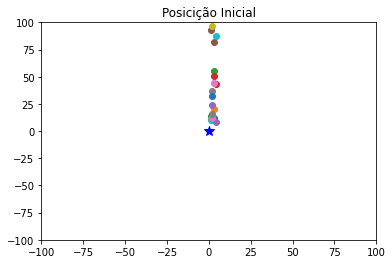

In [ ]:
#posiciona os indivíduos no espaço de busca
pontos = []
for i in range(POPULACAO):
  lista_pontos = []
  for j in range(DIMENSOES):
    lista_pontos.append(populacao[i][j])
    #print('i',i,'j',j,'populacao[i][j]:',populacao[i][j])
  pontos.append(lista_pontos)
exibe_grafico('Posicição Inicial',pontos)

  0%|          | 0/200 [00:00<?, ?it/s]

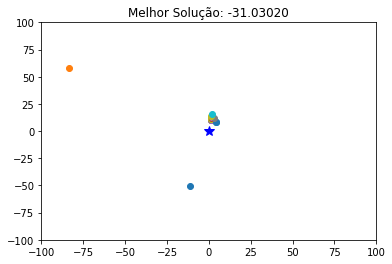

  0%|          | 1/200 [00:00<00:32,  6.20it/s]

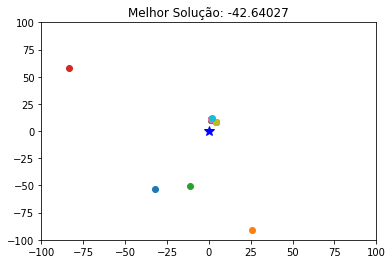

  1%|          | 2/200 [00:00<00:32,  6.12it/s]

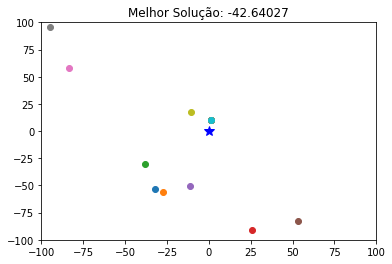

  2%|▏         | 3/200 [00:00<00:31,  6.19it/s]

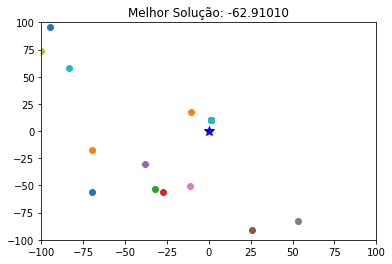

  2%|▏         | 4/200 [00:00<00:31,  6.13it/s]

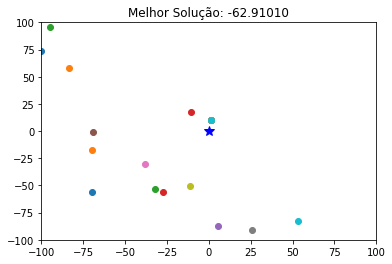

  2%|▎         | 5/200 [00:00<00:33,  5.84it/s]

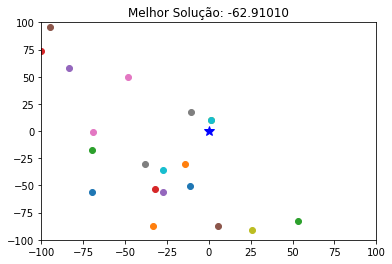

  3%|▎         | 6/200 [00:01<00:42,  4.57it/s]

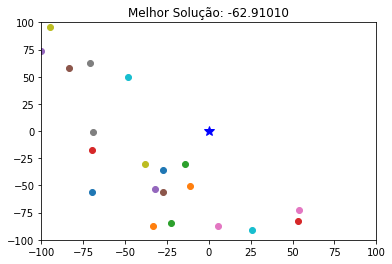

  4%|▎         | 7/200 [00:01<00:38,  5.02it/s]

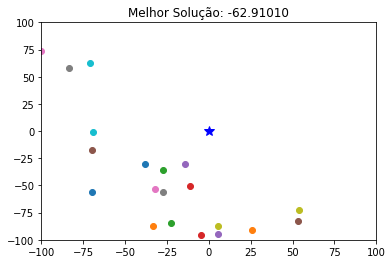

  4%|▍         | 8/200 [00:01<00:35,  5.34it/s]

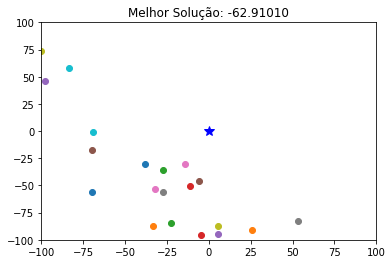

  4%|▍         | 9/200 [00:01<00:34,  5.57it/s]

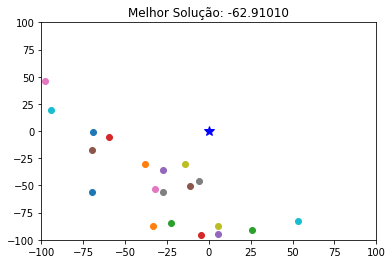

  5%|▌         | 10/200 [00:01<00:33,  5.69it/s]

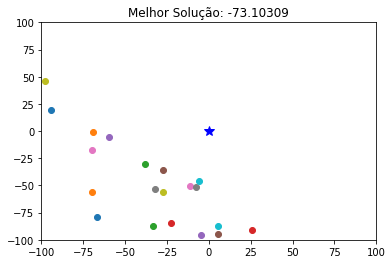

  6%|▌         | 11/200 [00:01<00:34,  5.47it/s]

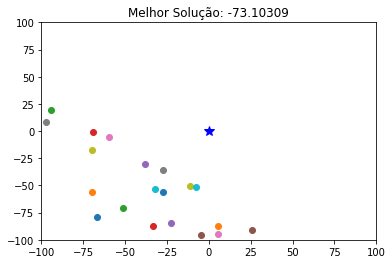

  6%|▌         | 12/200 [00:02<00:33,  5.59it/s]

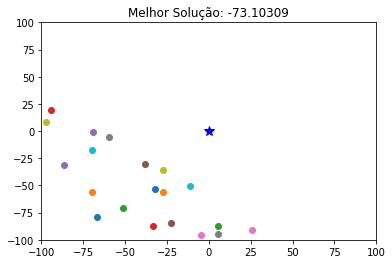

  6%|▋         | 13/200 [00:02<00:32,  5.80it/s]

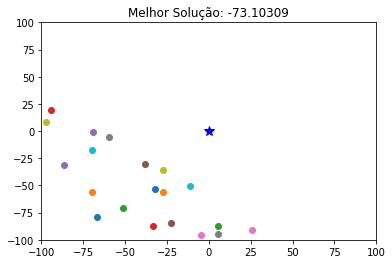

  7%|▋         | 14/200 [00:02<00:31,  5.90it/s]

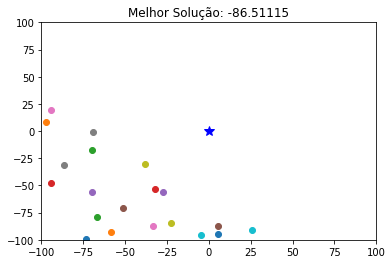

  8%|▊         | 15/200 [00:02<00:31,  5.87it/s]

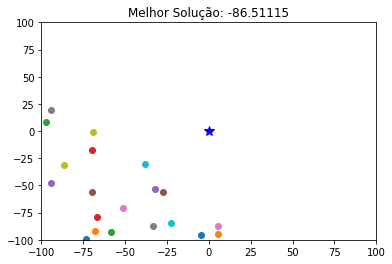

  8%|▊         | 16/200 [00:02<00:31,  5.86it/s]

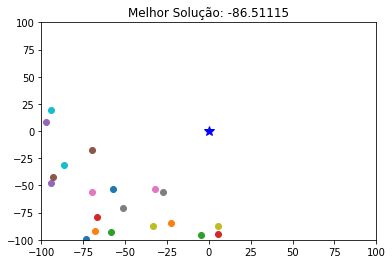

  8%|▊         | 17/200 [00:03<00:32,  5.70it/s]

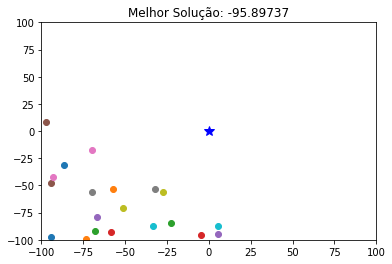

  9%|▉         | 18/200 [00:03<00:30,  5.89it/s]

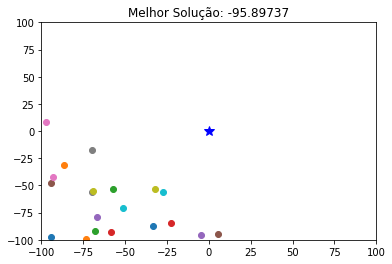

 10%|▉         | 19/200 [00:03<00:36,  4.94it/s]

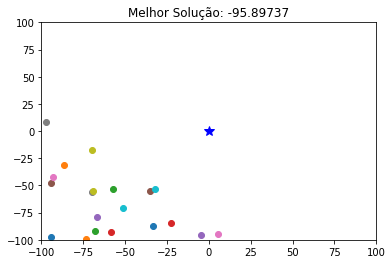

 10%|█         | 20/200 [00:03<00:34,  5.22it/s]

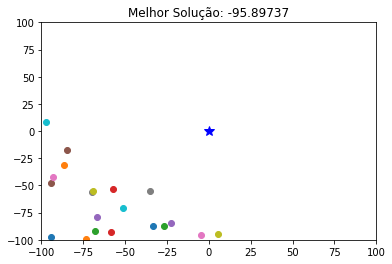

 10%|█         | 21/200 [00:03<00:32,  5.44it/s]

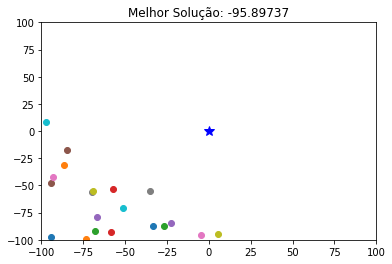

 11%|█         | 22/200 [00:03<00:31,  5.57it/s]

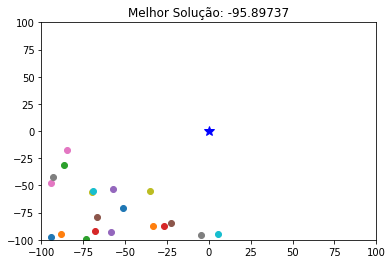

 12%|█▏        | 23/200 [00:04<00:31,  5.69it/s]

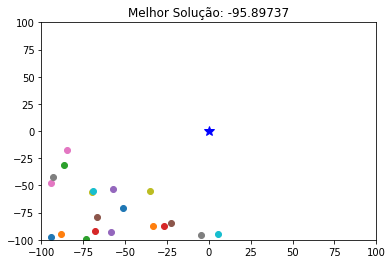

 12%|█▏        | 24/200 [00:04<00:30,  5.82it/s]

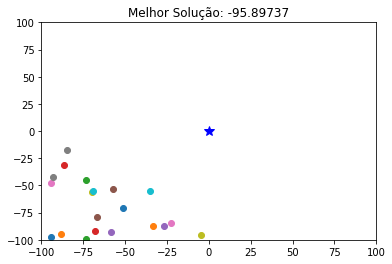

 12%|█▎        | 25/200 [00:04<00:29,  5.96it/s]

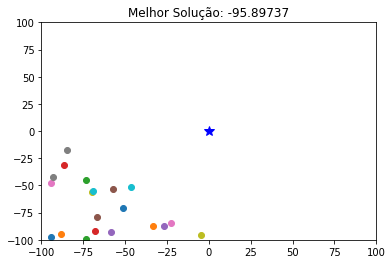

 13%|█▎        | 26/200 [00:04<00:29,  5.98it/s]

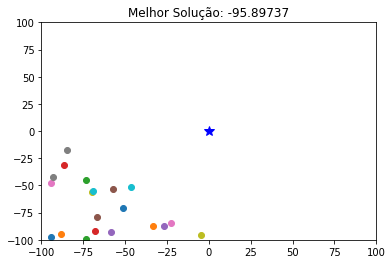

 14%|█▎        | 27/200 [00:04<00:29,  5.88it/s]

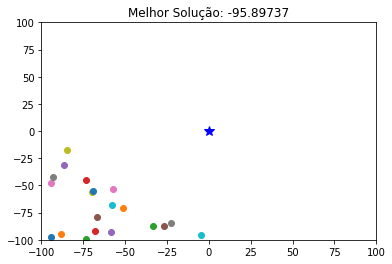

 14%|█▍        | 28/200 [00:04<00:30,  5.73it/s]

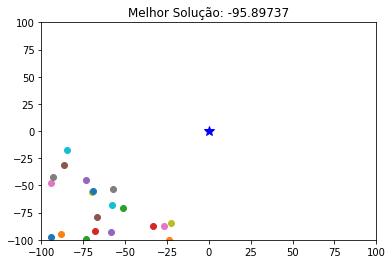

 14%|█▍        | 29/200 [00:05<00:29,  5.88it/s]

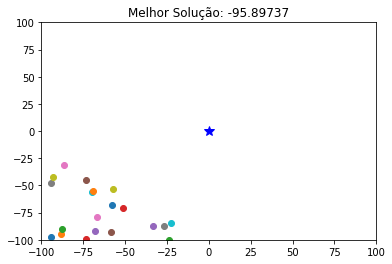

 15%|█▌        | 30/200 [00:05<00:28,  5.89it/s]

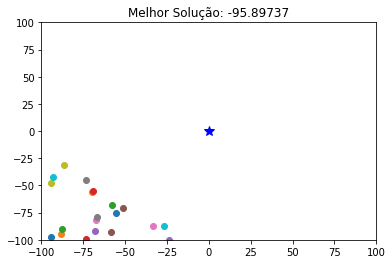

 16%|█▌        | 31/200 [00:05<00:28,  5.97it/s]

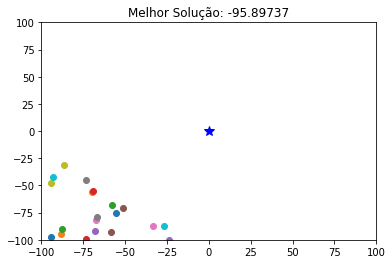

 16%|█▌        | 32/200 [00:05<00:35,  4.76it/s]

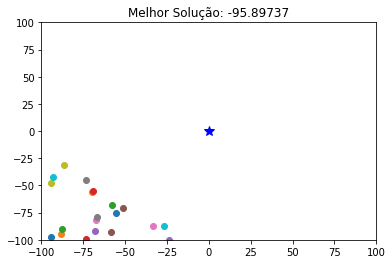

 16%|█▋        | 33/200 [00:05<00:32,  5.11it/s]

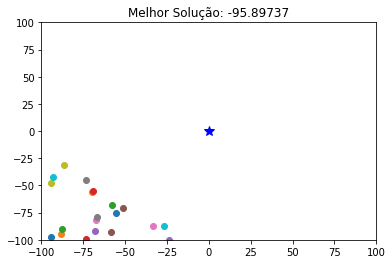

 17%|█▋        | 34/200 [00:06<00:31,  5.31it/s]

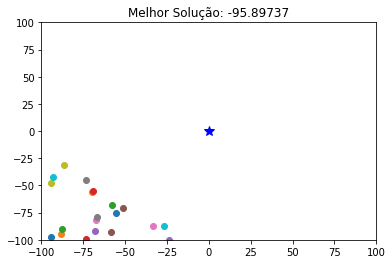

 18%|█▊        | 35/200 [00:06<00:30,  5.42it/s]

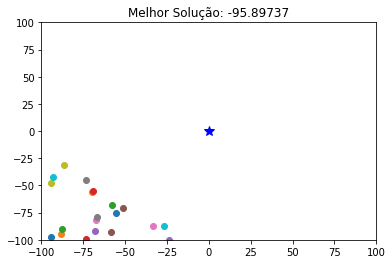

 18%|█▊        | 36/200 [00:06<00:29,  5.56it/s]

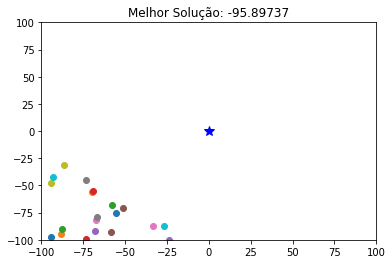

 18%|█▊        | 37/200 [00:06<00:28,  5.67it/s]

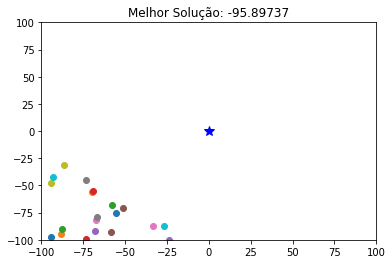

 19%|█▉        | 38/200 [00:06<00:27,  5.81it/s]

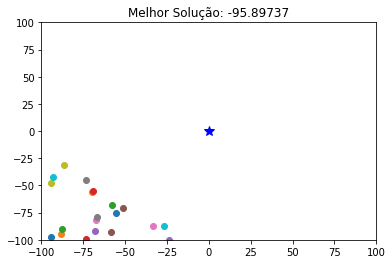

 20%|█▉        | 39/200 [00:06<00:28,  5.61it/s]

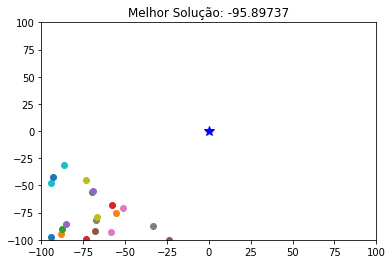

 20%|██        | 40/200 [00:07<00:27,  5.76it/s]

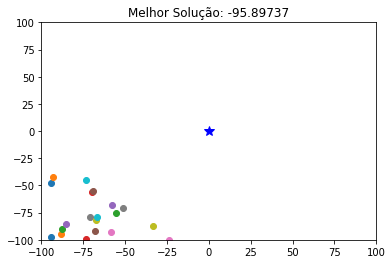

 20%|██        | 41/200 [00:07<00:27,  5.85it/s]

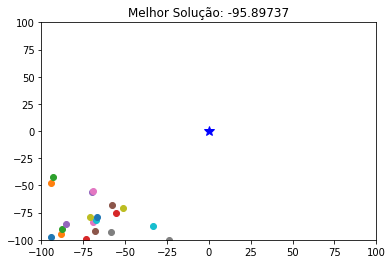

 21%|██        | 42/200 [00:07<00:26,  5.99it/s]

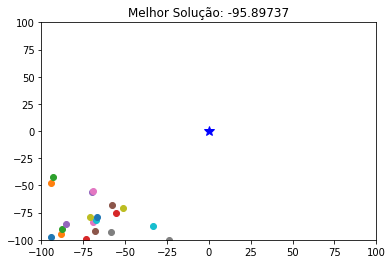

 22%|██▏       | 43/200 [00:07<00:25,  6.06it/s]

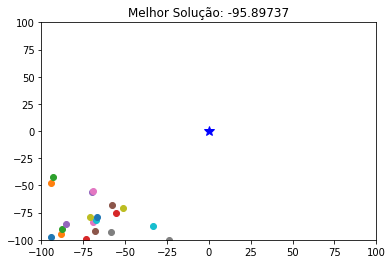

 22%|██▏       | 44/200 [00:07<00:26,  5.98it/s]

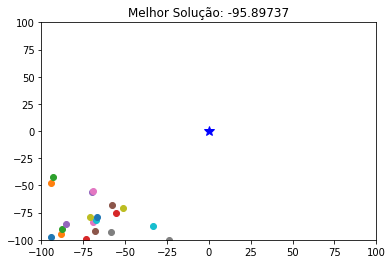

 22%|██▎       | 45/200 [00:08<00:31,  4.86it/s]

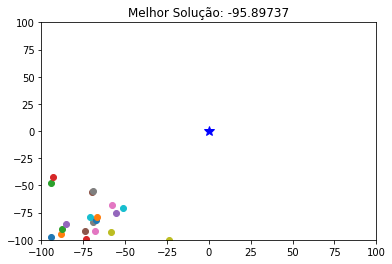

 23%|██▎       | 46/200 [00:08<00:29,  5.17it/s]

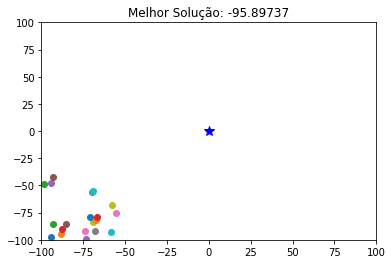

 24%|██▎       | 47/200 [00:08<00:28,  5.36it/s]

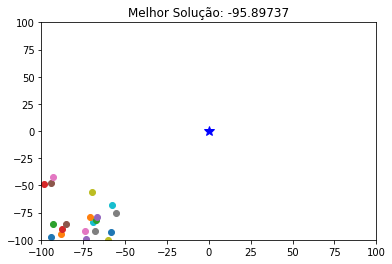

 24%|██▍       | 48/200 [00:08<00:27,  5.57it/s]

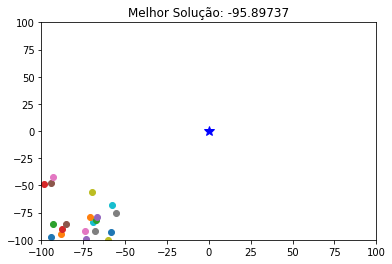

 24%|██▍       | 49/200 [00:08<00:26,  5.69it/s]

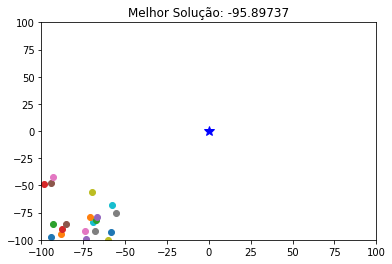

 25%|██▌       | 50/200 [00:08<00:26,  5.63it/s]

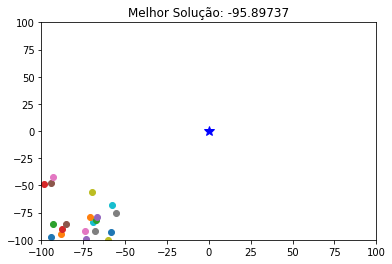

 26%|██▌       | 51/200 [00:09<00:26,  5.66it/s]

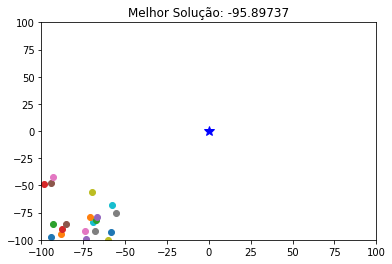

 26%|██▌       | 52/200 [00:09<00:25,  5.74it/s]

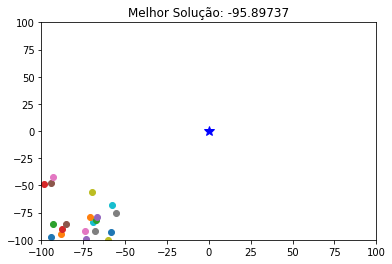

 26%|██▋       | 53/200 [00:09<00:25,  5.87it/s]

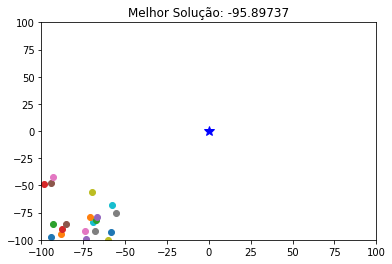

 27%|██▋       | 54/200 [00:09<00:25,  5.83it/s]

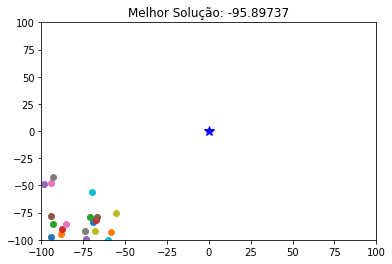

 28%|██▊       | 55/200 [00:09<00:24,  5.83it/s]

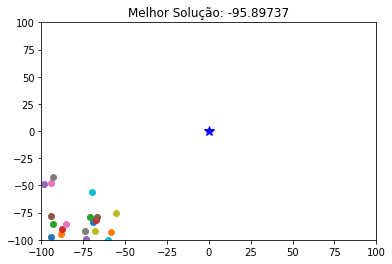

 28%|██▊       | 56/200 [00:09<00:24,  5.83it/s]

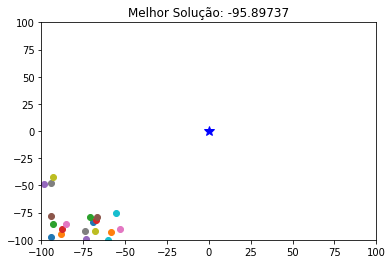

 28%|██▊       | 57/200 [00:10<00:24,  5.73it/s]

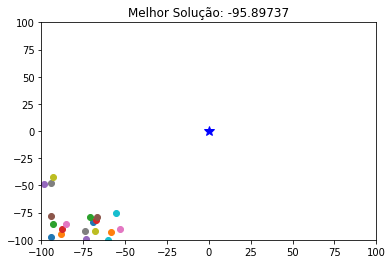

 29%|██▉       | 58/200 [00:10<00:29,  4.76it/s]

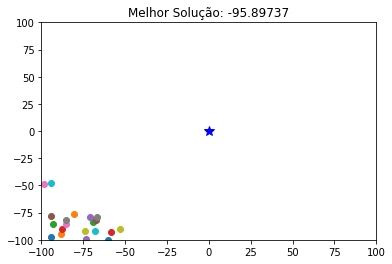

 30%|██▉       | 59/200 [00:10<00:27,  5.07it/s]

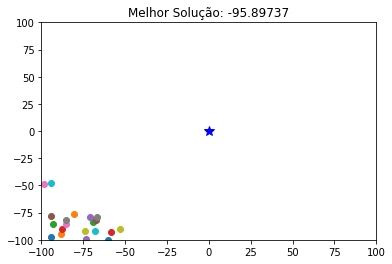

 30%|███       | 60/200 [00:10<00:26,  5.25it/s]

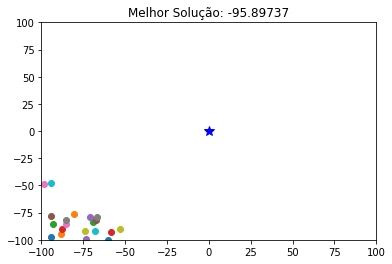

 30%|███       | 61/200 [00:10<00:25,  5.36it/s]

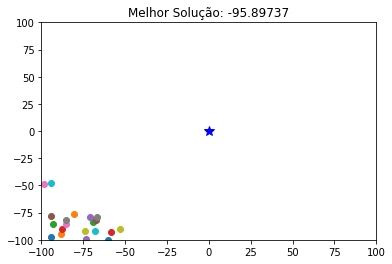

 31%|███       | 62/200 [00:11<00:25,  5.38it/s]

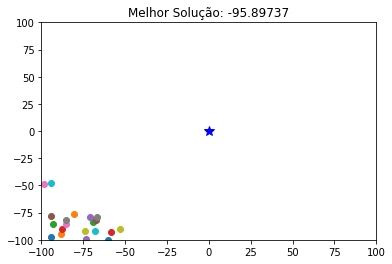

 32%|███▏      | 63/200 [00:11<00:25,  5.39it/s]

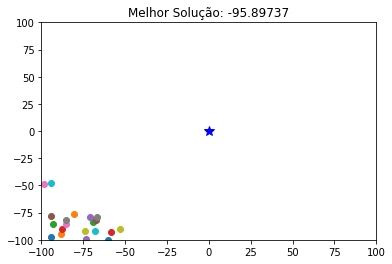

 32%|███▏      | 64/200 [00:11<00:24,  5.58it/s]

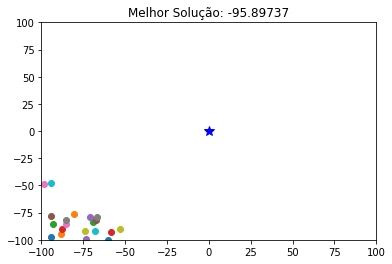

 32%|███▎      | 65/200 [00:11<00:23,  5.67it/s]

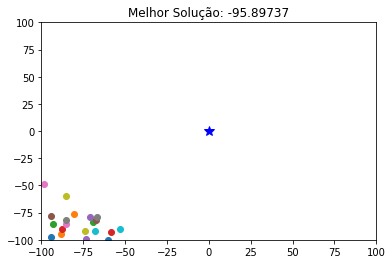

 33%|███▎      | 66/200 [00:11<00:23,  5.69it/s]

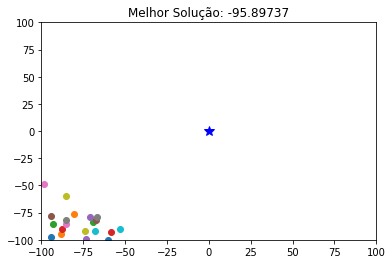

 34%|███▎      | 67/200 [00:12<00:23,  5.66it/s]

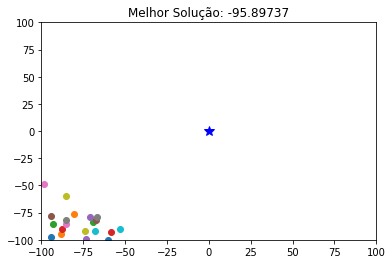

 34%|███▍      | 68/200 [00:12<00:23,  5.56it/s]

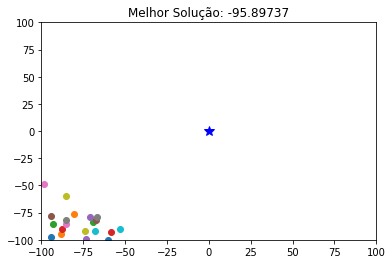

 34%|███▍      | 69/200 [00:12<00:22,  5.72it/s]

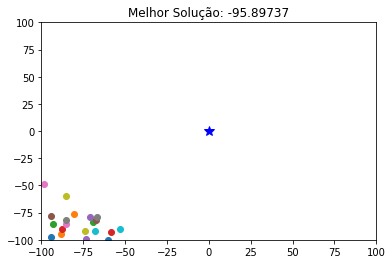

 35%|███▌      | 70/200 [00:12<00:22,  5.70it/s]

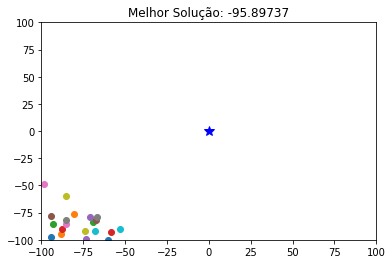

 36%|███▌      | 71/200 [00:12<00:27,  4.74it/s]

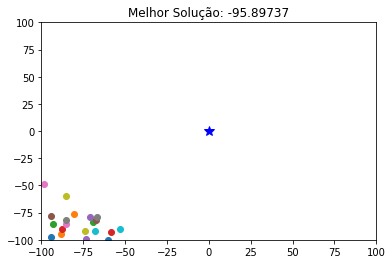

 36%|███▌      | 72/200 [00:13<00:25,  4.97it/s]

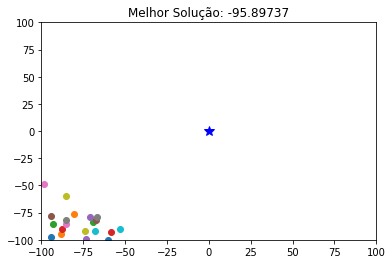

 36%|███▋      | 73/200 [00:13<00:24,  5.12it/s]

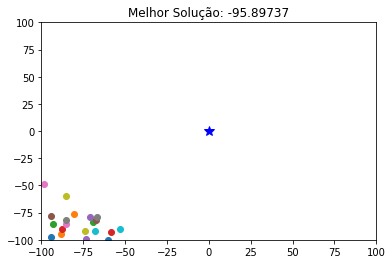

 37%|███▋      | 74/200 [00:13<00:23,  5.39it/s]

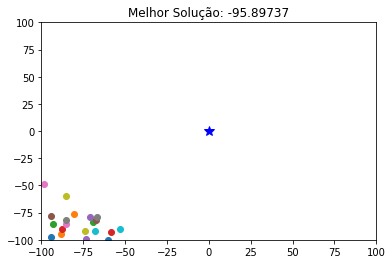

 38%|███▊      | 75/200 [00:13<00:22,  5.52it/s]

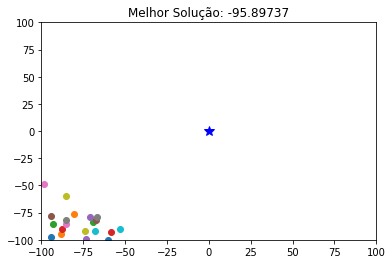

 38%|███▊      | 76/200 [00:13<00:21,  5.67it/s]

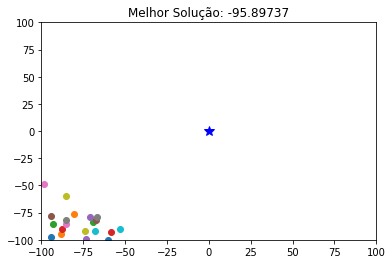

 38%|███▊      | 77/200 [00:13<00:21,  5.64it/s]

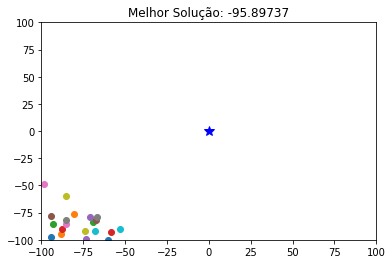

 39%|███▉      | 78/200 [00:14<00:21,  5.72it/s]

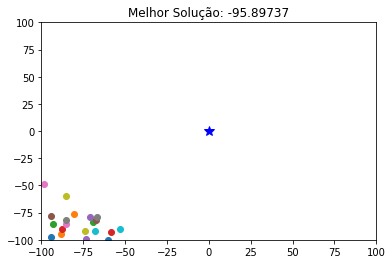

 40%|███▉      | 79/200 [00:14<00:21,  5.67it/s]

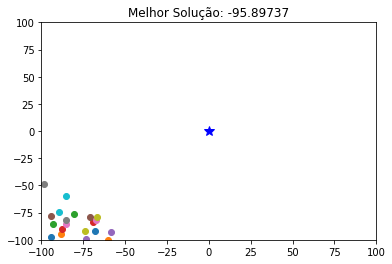

 40%|████      | 80/200 [00:14<00:20,  5.75it/s]

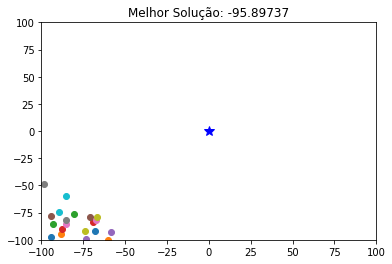

 40%|████      | 81/200 [00:14<00:20,  5.75it/s]

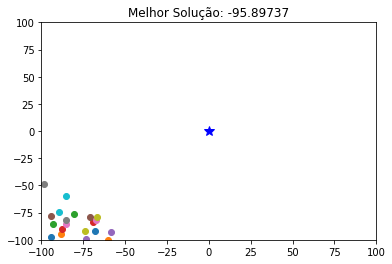

 41%|████      | 82/200 [00:14<00:20,  5.70it/s]

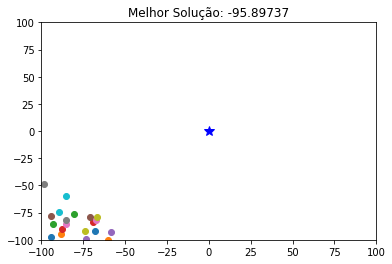

 42%|████▏     | 83/200 [00:14<00:20,  5.70it/s]

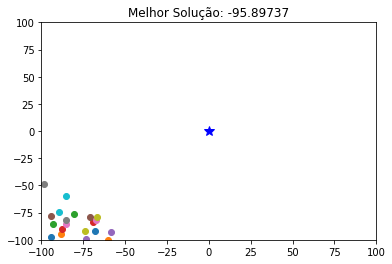

 42%|████▏     | 84/200 [00:15<00:24,  4.75it/s]

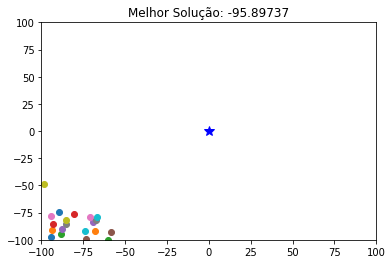

 42%|████▎     | 85/200 [00:15<00:22,  5.07it/s]

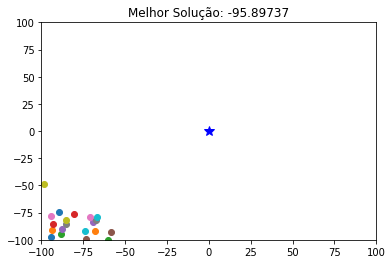

 43%|████▎     | 86/200 [00:15<00:21,  5.23it/s]

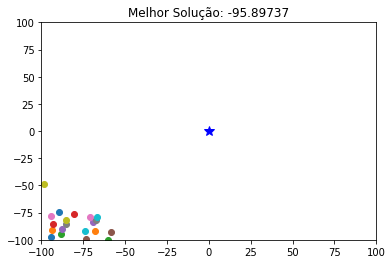

 44%|████▎     | 87/200 [00:15<00:21,  5.30it/s]

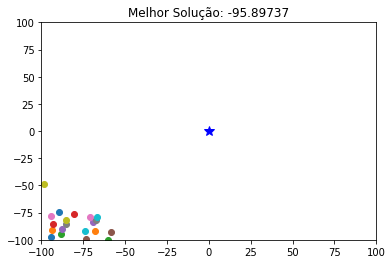

 44%|████▍     | 88/200 [00:15<00:20,  5.48it/s]

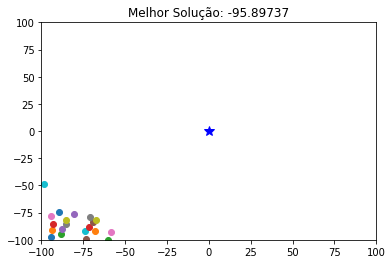

 44%|████▍     | 89/200 [00:16<00:19,  5.59it/s]

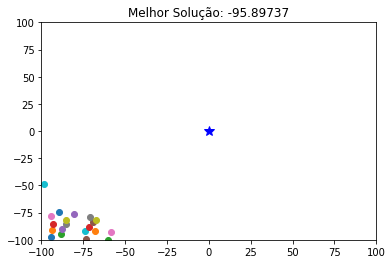

 45%|████▌     | 90/200 [00:16<00:19,  5.61it/s]

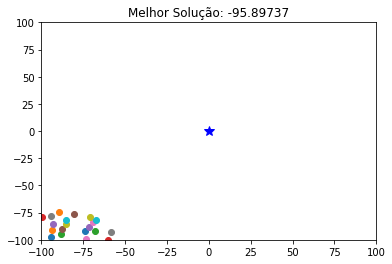

 46%|████▌     | 91/200 [00:16<00:19,  5.73it/s]

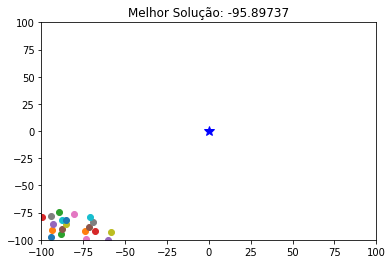

 46%|████▌     | 92/200 [00:16<00:18,  5.78it/s]

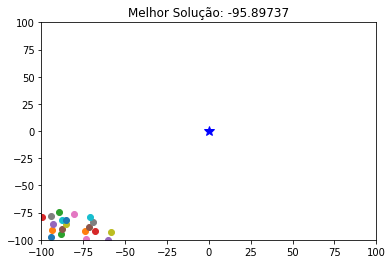

 46%|████▋     | 93/200 [00:16<00:18,  5.70it/s]

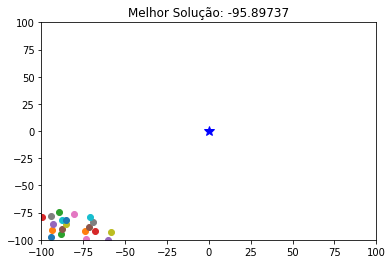

 47%|████▋     | 94/200 [00:16<00:19,  5.58it/s]

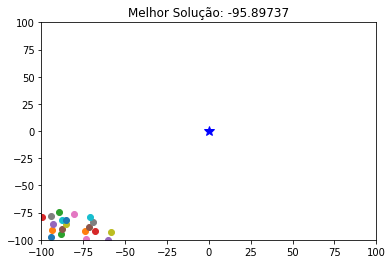

 48%|████▊     | 95/200 [00:17<00:18,  5.62it/s]

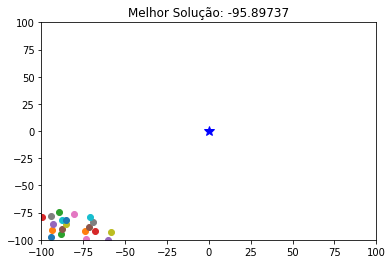

 48%|████▊     | 96/200 [00:17<00:18,  5.60it/s]

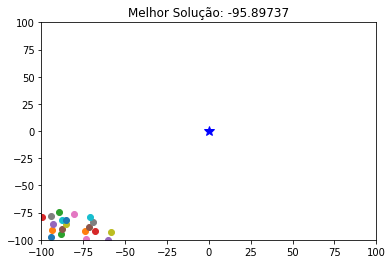

 48%|████▊     | 97/200 [00:17<00:21,  4.81it/s]

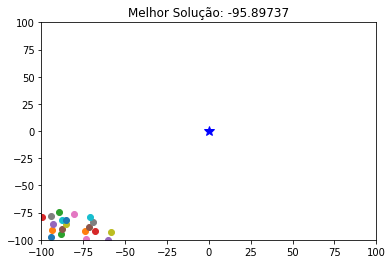

 49%|████▉     | 98/200 [00:17<00:20,  5.05it/s]

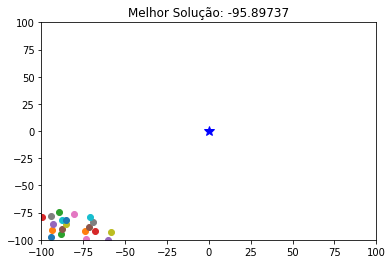

 50%|████▉     | 99/200 [00:17<00:19,  5.22it/s]

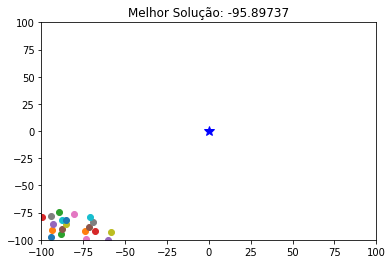

 50%|█████     | 100/200 [00:18<00:18,  5.45it/s]

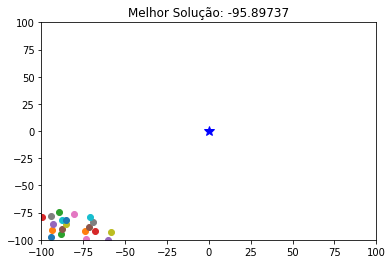

 50%|█████     | 101/200 [00:18<00:18,  5.46it/s]

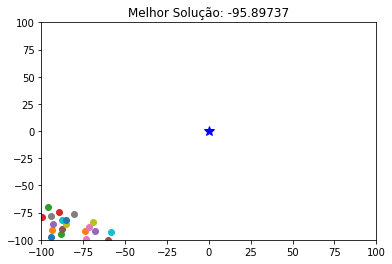

 51%|█████     | 102/200 [00:18<00:17,  5.62it/s]

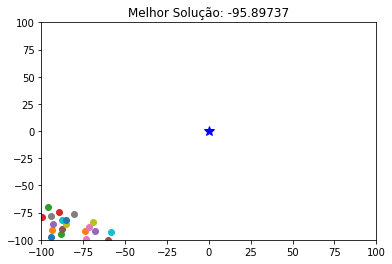

 52%|█████▏    | 103/200 [00:18<00:17,  5.65it/s]

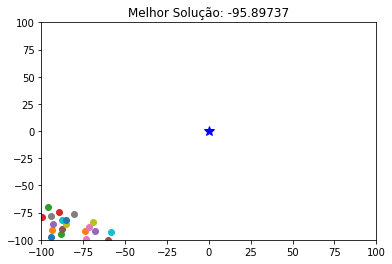

 52%|█████▏    | 104/200 [00:18<00:17,  5.45it/s]

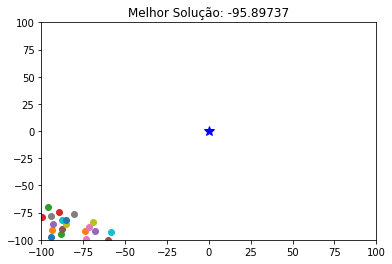

 52%|█████▎    | 105/200 [00:18<00:17,  5.46it/s]

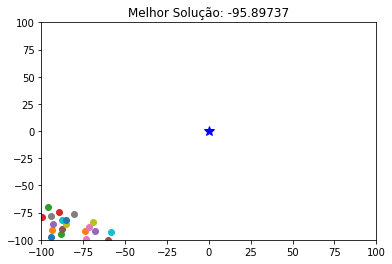

 53%|█████▎    | 106/200 [00:19<00:17,  5.31it/s]

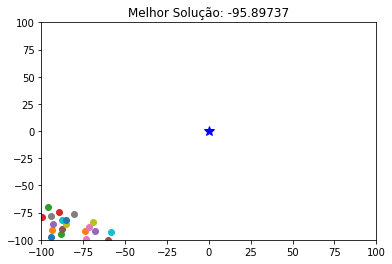

 54%|█████▎    | 107/200 [00:19<00:17,  5.47it/s]

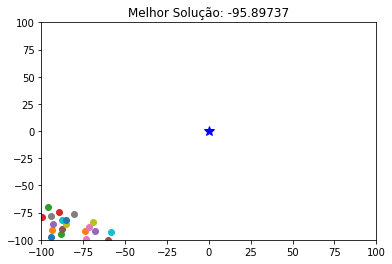

 54%|█████▍    | 108/200 [00:19<00:16,  5.53it/s]

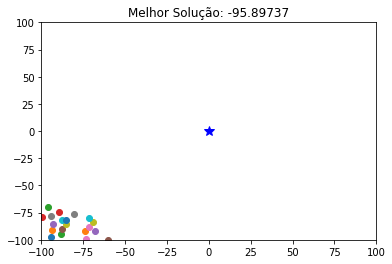

 55%|█████▍    | 109/200 [00:19<00:16,  5.51it/s]

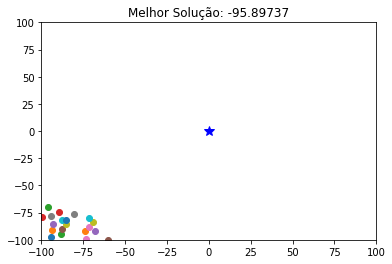

 55%|█████▌    | 110/200 [00:20<00:19,  4.59it/s]

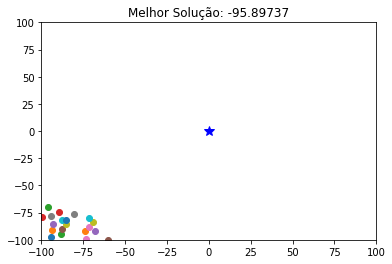

 56%|█████▌    | 111/200 [00:20<00:18,  4.83it/s]

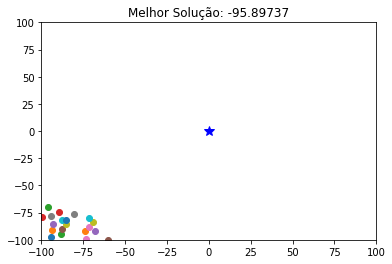

 56%|█████▌    | 112/200 [00:20<00:17,  5.10it/s]

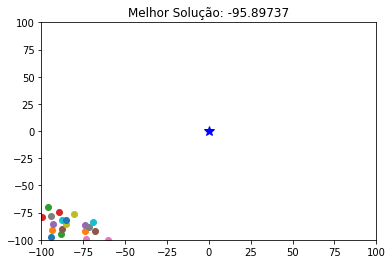

 56%|█████▋    | 113/200 [00:20<00:16,  5.26it/s]

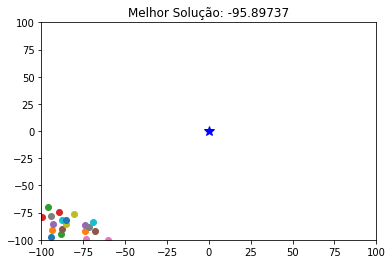

 57%|█████▋    | 114/200 [00:20<00:15,  5.41it/s]

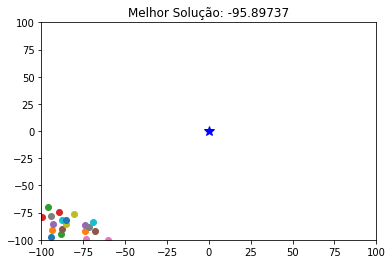

 57%|█████▊    | 115/200 [00:20<00:16,  5.19it/s]

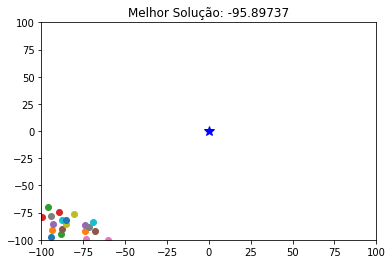

 58%|█████▊    | 116/200 [00:21<00:15,  5.25it/s]

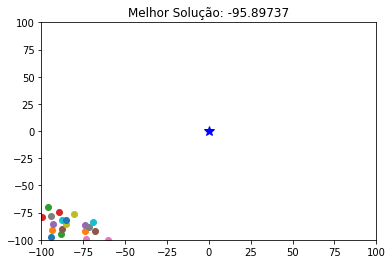

 58%|█████▊    | 117/200 [00:21<00:15,  5.20it/s]

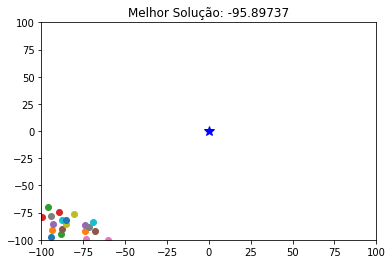

 59%|█████▉    | 118/200 [00:21<00:15,  5.30it/s]

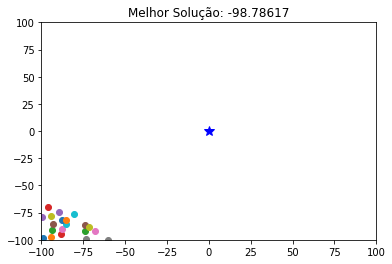

 60%|█████▉    | 119/200 [00:21<00:15,  5.29it/s]

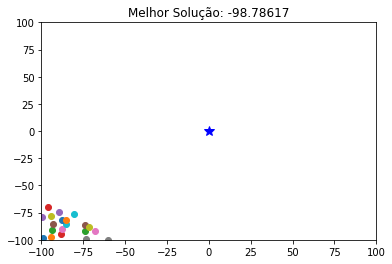

 60%|██████    | 120/200 [00:21<00:15,  5.21it/s]

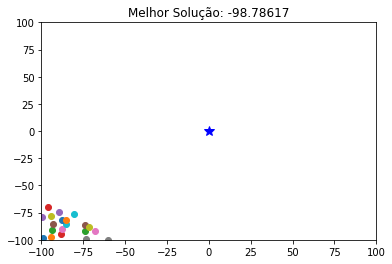

 60%|██████    | 121/200 [00:22<00:15,  5.19it/s]

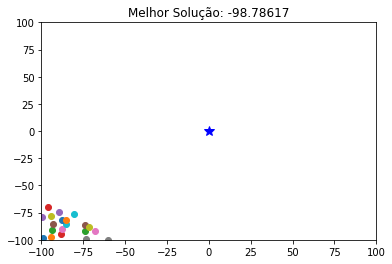

 61%|██████    | 122/200 [00:22<00:15,  5.05it/s]

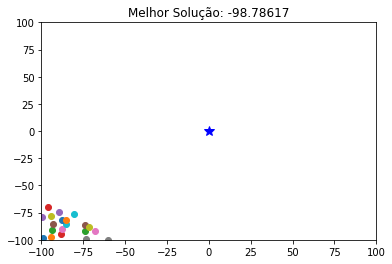

 62%|██████▏   | 123/200 [00:22<00:17,  4.41it/s]

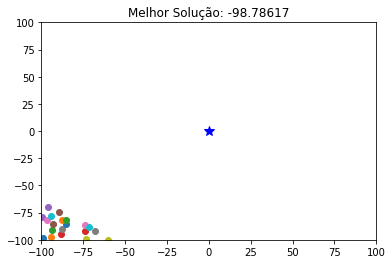

 62%|██████▏   | 124/200 [00:22<00:16,  4.74it/s]

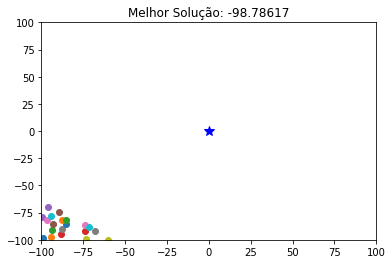

 62%|██████▎   | 125/200 [00:22<00:15,  4.92it/s]

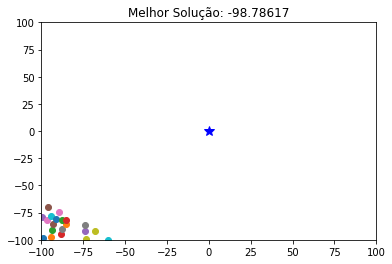

 63%|██████▎   | 126/200 [00:23<00:14,  5.02it/s]

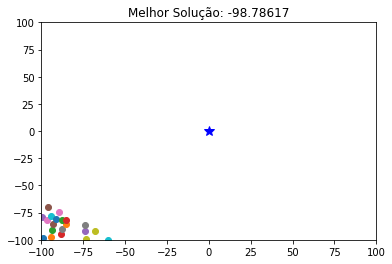

 64%|██████▎   | 127/200 [00:23<00:14,  5.04it/s]

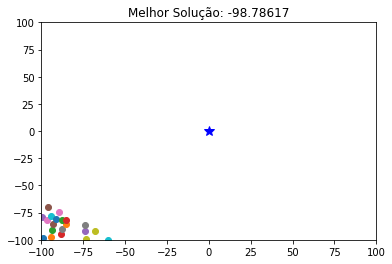

 64%|██████▍   | 128/200 [00:23<00:13,  5.23it/s]

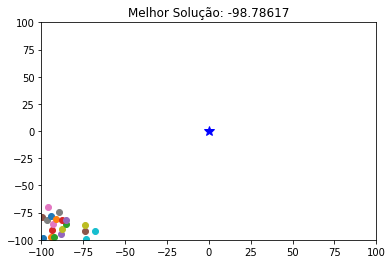

 64%|██████▍   | 129/200 [00:23<00:13,  5.37it/s]

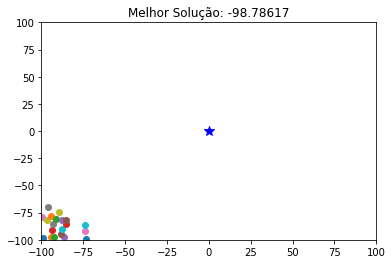

 65%|██████▌   | 130/200 [00:23<00:12,  5.39it/s]

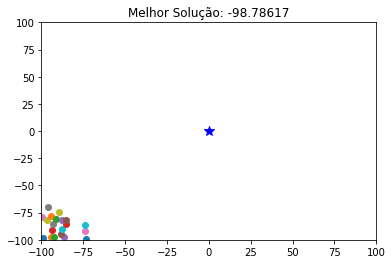

 66%|██████▌   | 131/200 [00:24<00:12,  5.46it/s]

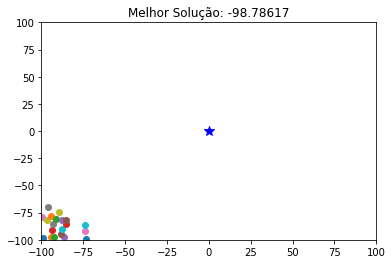

 66%|██████▌   | 132/200 [00:24<00:12,  5.57it/s]

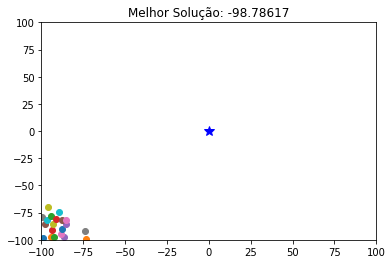

 66%|██████▋   | 133/200 [00:24<00:11,  5.59it/s]

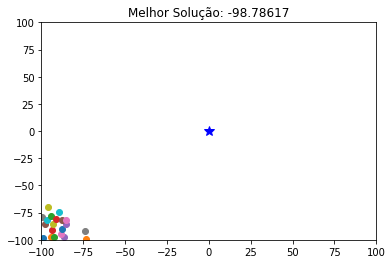

 67%|██████▋   | 134/200 [00:24<00:11,  5.64it/s]

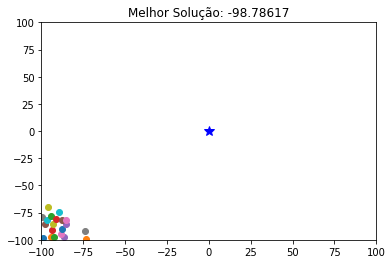

 68%|██████▊   | 135/200 [00:24<00:11,  5.70it/s]

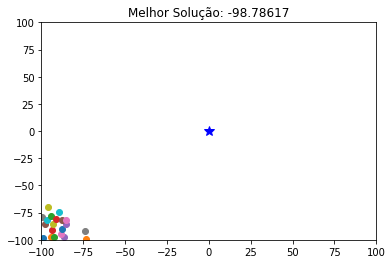

 68%|██████▊   | 136/200 [00:25<00:13,  4.62it/s]

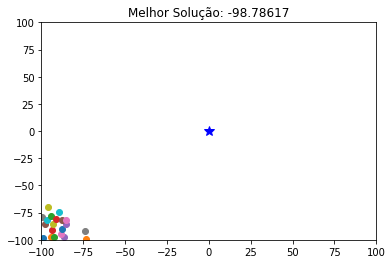

 68%|██████▊   | 137/200 [00:25<00:13,  4.81it/s]

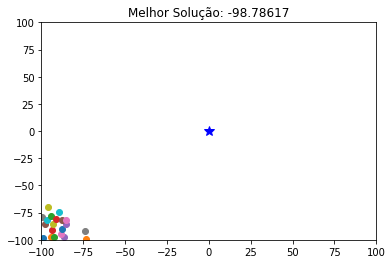

 69%|██████▉   | 138/200 [00:25<00:12,  5.07it/s]

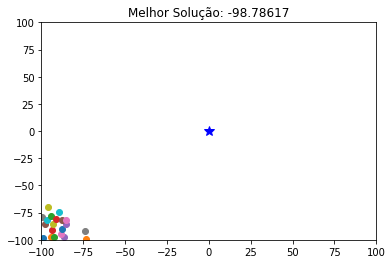

 70%|██████▉   | 139/200 [00:25<00:11,  5.21it/s]

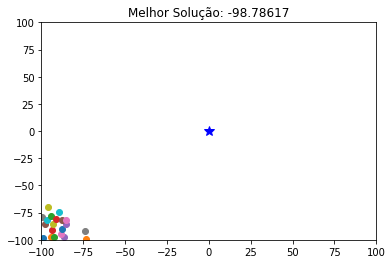

 70%|███████   | 140/200 [00:25<00:11,  5.38it/s]

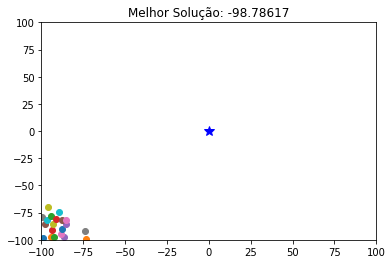

 70%|███████   | 141/200 [00:25<00:10,  5.43it/s]

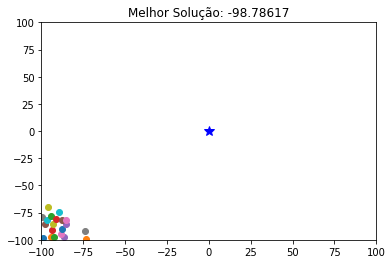

 71%|███████   | 142/200 [00:26<00:10,  5.56it/s]

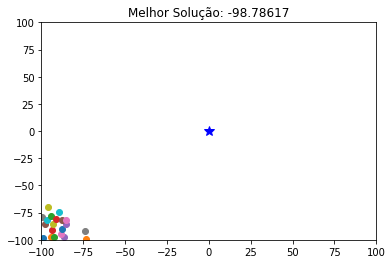

 72%|███████▏  | 143/200 [00:26<00:10,  5.51it/s]

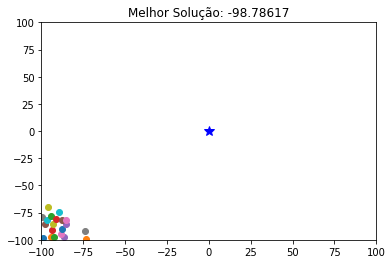

 72%|███████▏  | 144/200 [00:26<00:10,  5.55it/s]

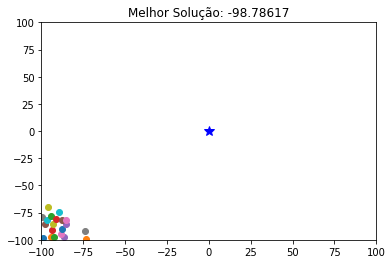

 72%|███████▎  | 145/200 [00:26<00:09,  5.61it/s]

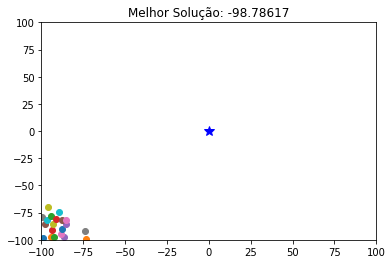

 73%|███████▎  | 146/200 [00:26<00:10,  5.40it/s]

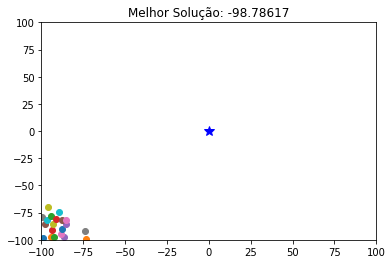

 74%|███████▎  | 147/200 [00:27<00:09,  5.48it/s]

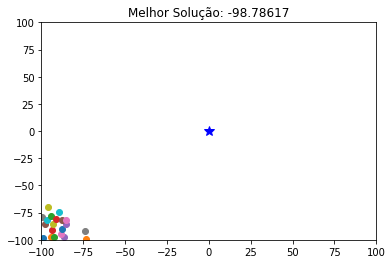

 74%|███████▍  | 148/200 [00:27<00:09,  5.46it/s]

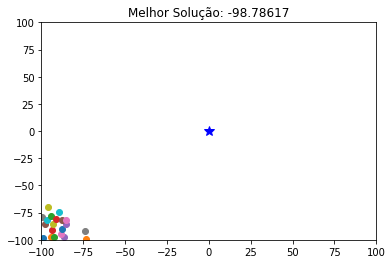

 74%|███████▍  | 149/200 [00:27<00:11,  4.63it/s]

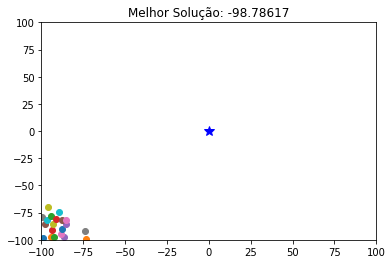

 75%|███████▌  | 150/200 [00:27<00:10,  4.96it/s]

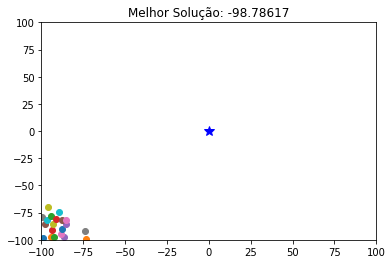

 76%|███████▌  | 151/200 [00:27<00:09,  5.13it/s]

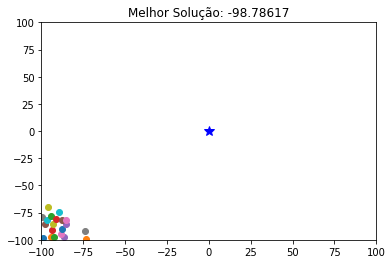

 76%|███████▌  | 152/200 [00:28<00:09,  5.29it/s]

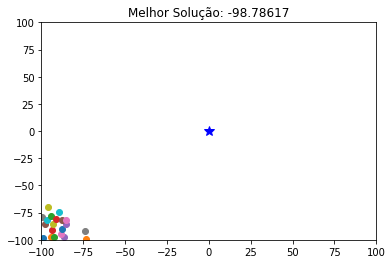

 76%|███████▋  | 153/200 [00:28<00:08,  5.34it/s]

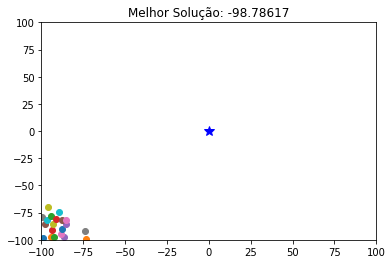

 77%|███████▋  | 154/200 [00:28<00:08,  5.32it/s]

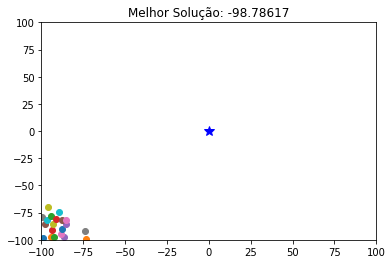

 78%|███████▊  | 155/200 [00:28<00:08,  5.37it/s]

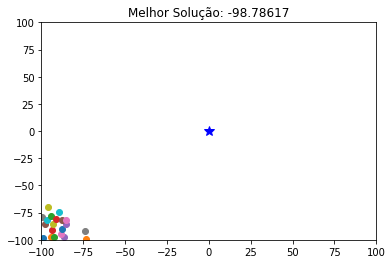

 78%|███████▊  | 156/200 [00:28<00:08,  5.48it/s]

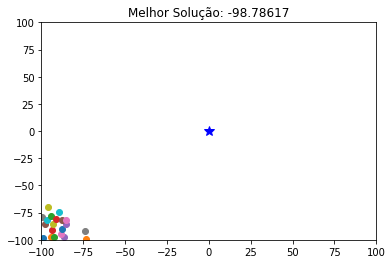

 78%|███████▊  | 157/200 [00:28<00:07,  5.42it/s]

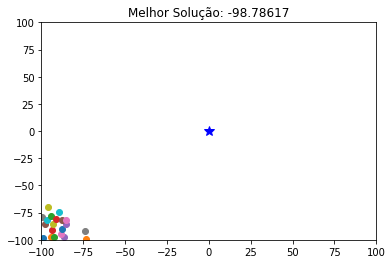

 79%|███████▉  | 158/200 [00:29<00:07,  5.38it/s]

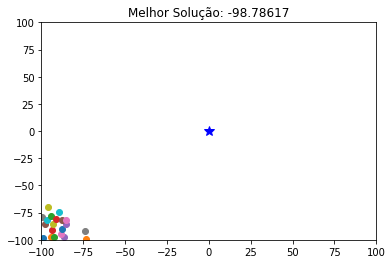

 80%|███████▉  | 159/200 [00:29<00:07,  5.51it/s]

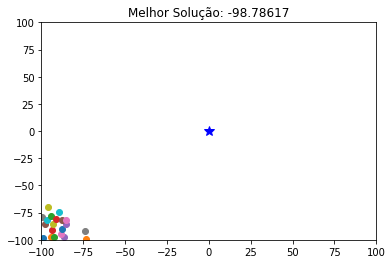

 80%|████████  | 160/200 [00:29<00:07,  5.54it/s]

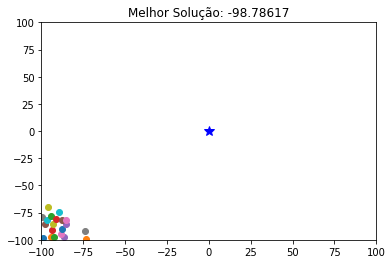

 80%|████████  | 161/200 [00:29<00:07,  5.56it/s]

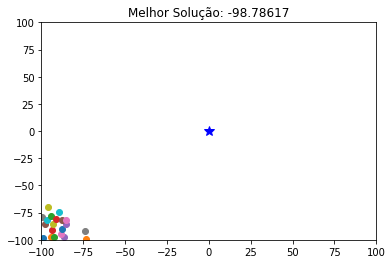

 81%|████████  | 162/200 [00:29<00:08,  4.60it/s]

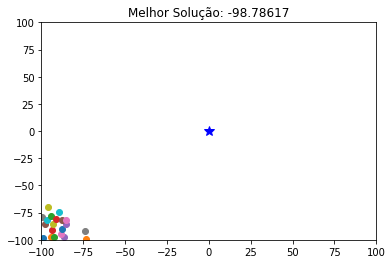

 82%|████████▏ | 163/200 [00:30<00:07,  4.75it/s]

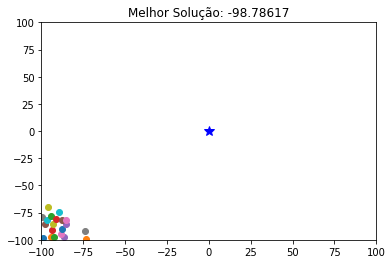

 82%|████████▏ | 164/200 [00:30<00:07,  4.96it/s]

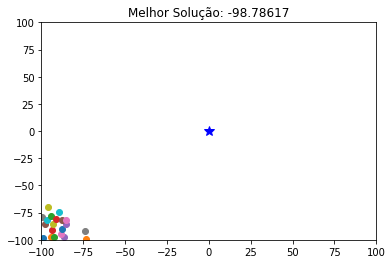

 82%|████████▎ | 165/200 [00:30<00:07,  4.97it/s]

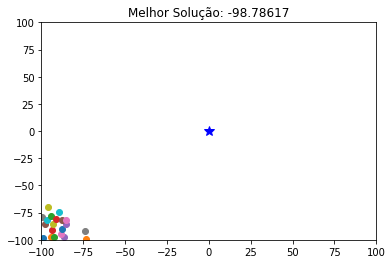

 83%|████████▎ | 166/200 [00:30<00:06,  5.12it/s]

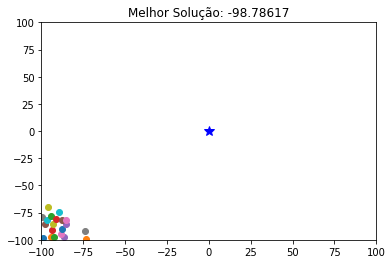

 84%|████████▎ | 167/200 [00:30<00:06,  5.25it/s]

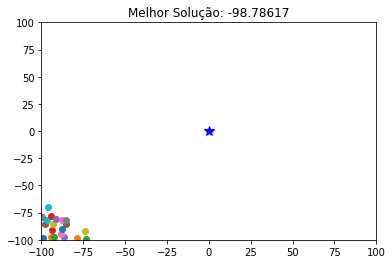

 84%|████████▍ | 168/200 [00:31<00:05,  5.38it/s]

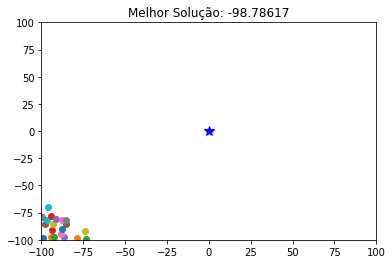

 84%|████████▍ | 169/200 [00:31<00:05,  5.45it/s]

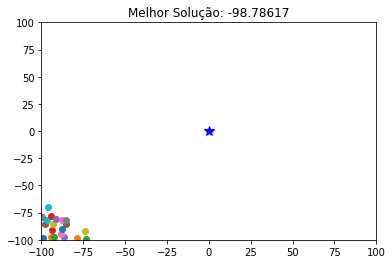

 85%|████████▌ | 170/200 [00:31<00:05,  5.56it/s]

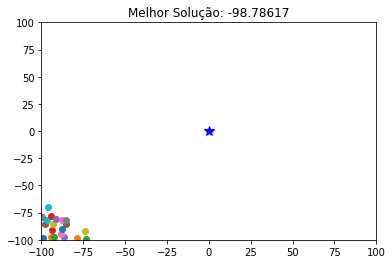

 86%|████████▌ | 171/200 [00:31<00:05,  5.47it/s]

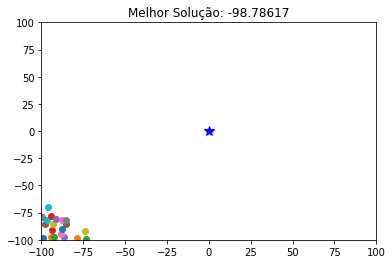

 86%|████████▌ | 172/200 [00:31<00:05,  5.52it/s]

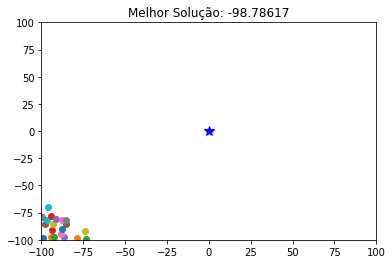

 86%|████████▋ | 173/200 [00:31<00:04,  5.40it/s]

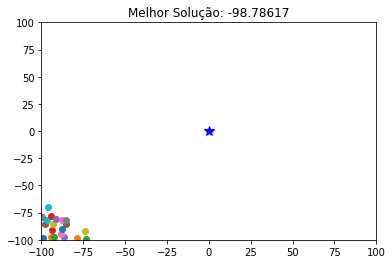

 87%|████████▋ | 174/200 [00:32<00:04,  5.41it/s]

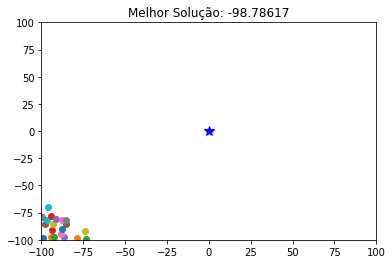

 88%|████████▊ | 175/200 [00:32<00:05,  4.64it/s]

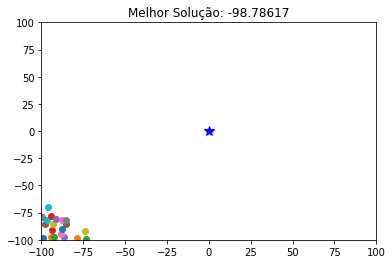

 88%|████████▊ | 176/200 [00:32<00:04,  4.89it/s]

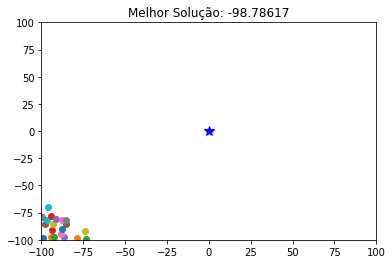

 88%|████████▊ | 177/200 [00:32<00:04,  5.11it/s]

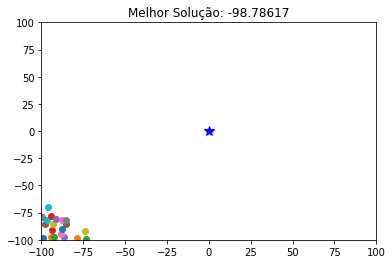

 89%|████████▉ | 178/200 [00:33<00:04,  5.15it/s]

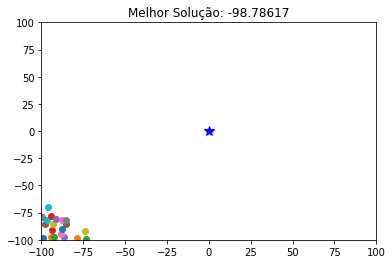

 90%|████████▉ | 179/200 [00:33<00:04,  5.06it/s]

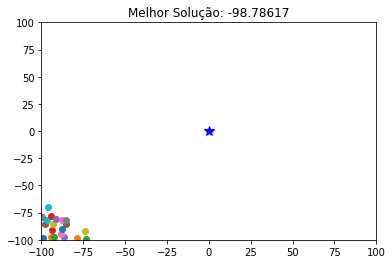

 90%|█████████ | 180/200 [00:33<00:03,  5.17it/s]

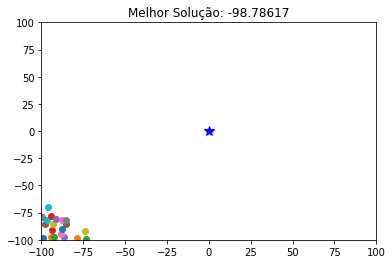

 90%|█████████ | 181/200 [00:33<00:03,  5.12it/s]

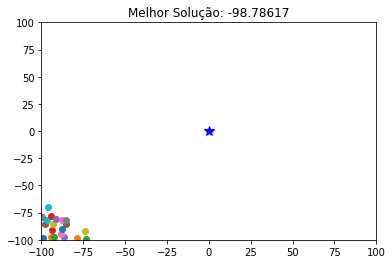

 91%|█████████ | 182/200 [00:33<00:03,  5.18it/s]

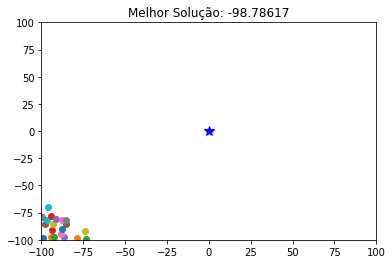

 92%|█████████▏| 183/200 [00:33<00:03,  5.22it/s]

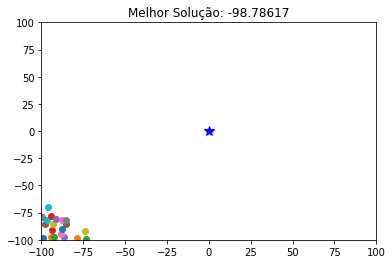

 92%|█████████▏| 184/200 [00:34<00:03,  5.33it/s]

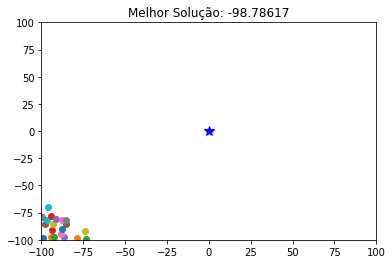

 92%|█████████▎| 185/200 [00:34<00:02,  5.43it/s]

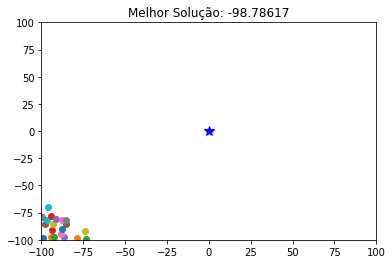

 93%|█████████▎| 186/200 [00:34<00:02,  5.50it/s]

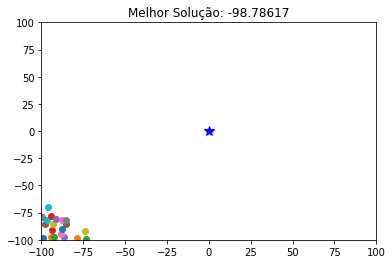

 94%|█████████▎| 187/200 [00:34<00:02,  5.49it/s]

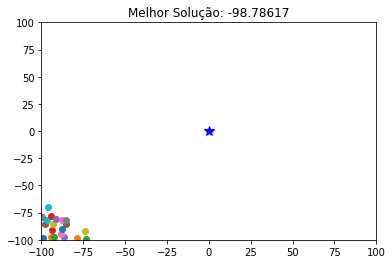

 94%|█████████▍| 188/200 [00:34<00:02,  4.53it/s]

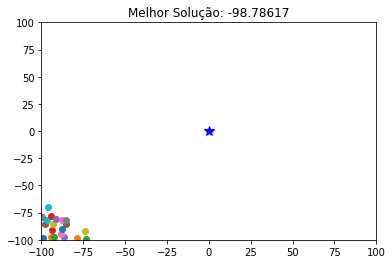

 94%|█████████▍| 189/200 [00:35<00:02,  4.73it/s]

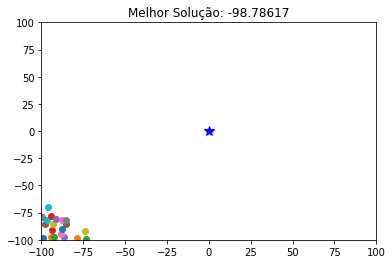

 95%|█████████▌| 190/200 [00:35<00:02,  4.92it/s]

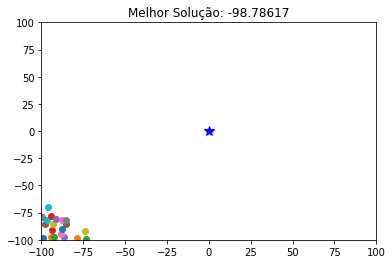

 96%|█████████▌| 191/200 [00:35<00:01,  5.05it/s]

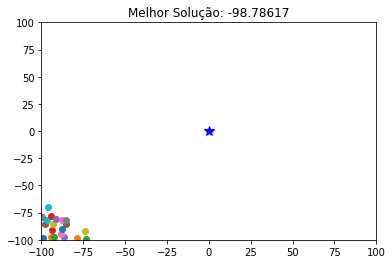

 96%|█████████▌| 192/200 [00:35<00:01,  5.11it/s]

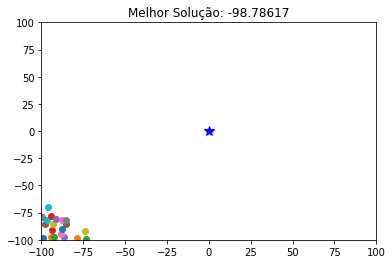

 96%|█████████▋| 193/200 [00:35<00:01,  5.18it/s]

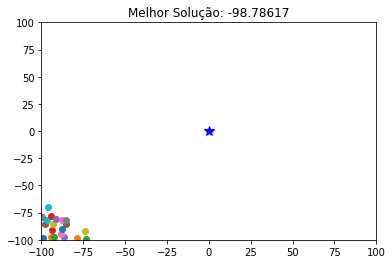

 97%|█████████▋| 194/200 [00:36<00:01,  5.24it/s]

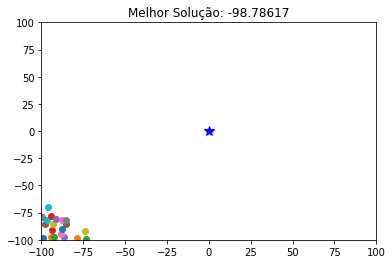

 98%|█████████▊| 195/200 [00:36<00:00,  5.30it/s]

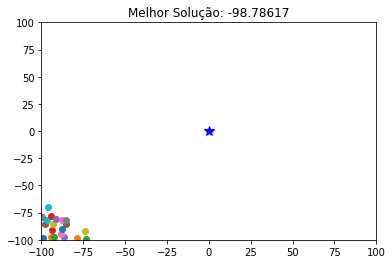

 98%|█████████▊| 196/200 [00:36<00:00,  5.30it/s]

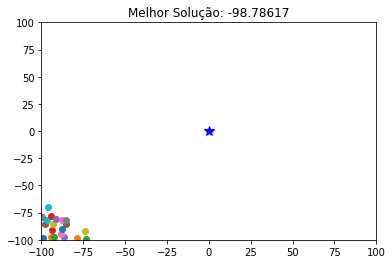

 98%|█████████▊| 197/200 [00:36<00:00,  5.18it/s]

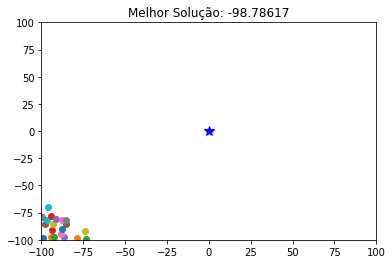

 99%|█████████▉| 198/200 [00:36<00:00,  5.22it/s]

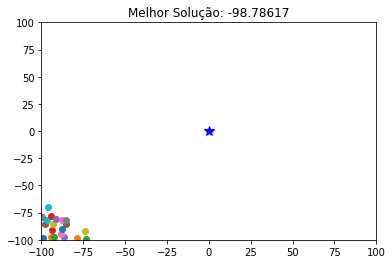

100%|█████████▉| 199/200 [00:37<00:00,  5.24it/s]

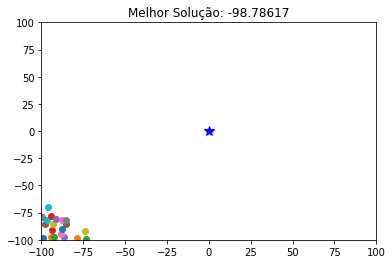

100%|██████████| 200/200 [00:37<00:00,  5.37it/s]


In [ ]:
#otimização CLONALG
best_fitness = 9999999999999999999
fitness_over_time = []
convergencia = []
for iteracao in tqdm(range(ITERACOES)): #print("Iteração: {:.0f}".format(iteracao+1))
  fitness = calcula_fitness_populacao(populacao)
  fitness_ordenado = ordenar_fitness(fitness)
  individuos_clonaveis = fitness_ordenado[0:NUMERO_SELECAO] #Seleciona os indivíduos que são clonados
  #gera os individuos clonados
  individuos_clonados = []
  for i in individuos_clonaveis:
    individuos_clonados += clonagem(i)
  #realiza a hipermutação
  individuos_mutados = []
  for i in individuos_clonados:
    individuos_mutados.append(mutacao(i, populacao))
  #faz seleção
  individuos_selecionados = selecao(populacao, individuos_mutados)
  #gera nova populacao aleatoria
  novos_individuos_aleatorios = gerar_novos_individuos(NOVOS_INDIVIDUOS)
  #faz seleção entre os novos individuos aleatorios e a população
  populacao = selecao(individuos_selecionados, novos_individuos_aleatorios)
  best_fit_iteration = fcusto(FCUSTO,populacao[0])
  if best_fit_iteration < best_fitness:
    best_fitness = best_fit_iteration
  fitness_over_time.append(best_fit_iteration)
  #posiciona os indivíduos no espaço de busca
  #pontos = []
  #for i in range(POPULACAO):
  #  pontos.append([populacao[i][0],populacao[i][1]])
  pontos = []
  for i in range(POPULACAO):
    lista_pontos = []
    for j in range(DIMENSOES):
      lista_pontos.append(populacao[i][j])
    pontos.append(lista_pontos)
  exibe_grafico('Melhor Solução: {:.5f}'.format(best_fit_iteration),pontos)
  convergencia.append(best_fit_iteration)

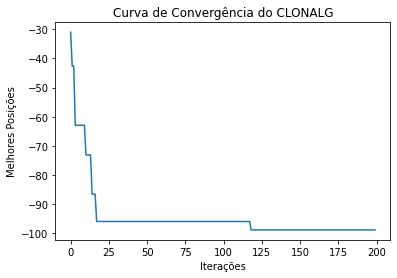

In [ ]:
#exibe curva de convergência dos indivíduos
x = []
y = []
for i in range(ITERACOES):
  x.append(i)
  y.append(convergencia[i])
plt.title("Curva de Convergência do CLONALG")
plt.xlabel("Iterações")
plt.ylabel("Melhores Posições")
plt.plot(x,y)
plt.show()
#for i in range(ITERACOES): print("iteração:",i,"posição:",convergencia[i])